# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


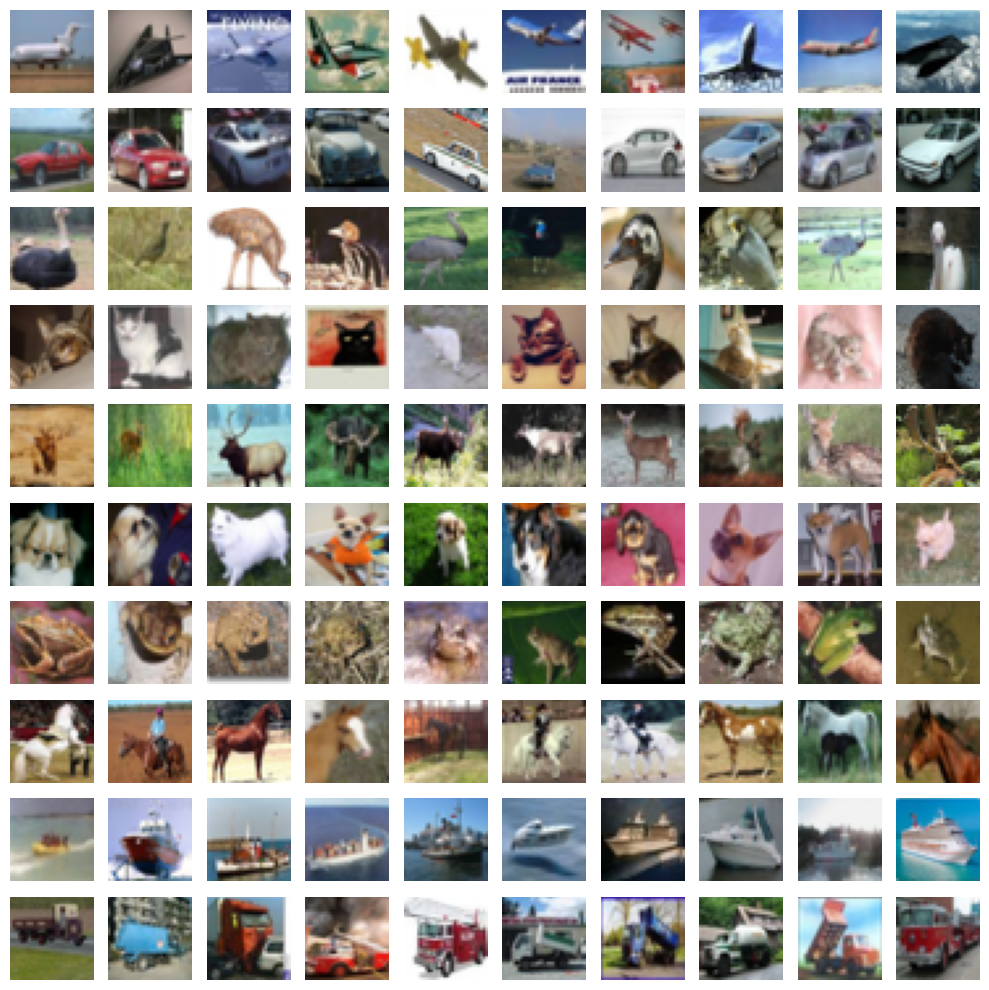

In [3]:
# Your code here :
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize image data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualization: 10x10 grid with 10 random samples from each class
plt.figure(figsize=(10, 10))
for i in range(10):
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    selected = np.random.choice(class_indices, 10, replace=False)
    for j, idx in enumerate(selected):
        plt_idx = i * 10 + j + 1
        plt.subplot(10, 10, plt_idx)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], fontsize=8)
plt.tight_layout()
plt.show()



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [4]:
from keras.backend import clear_session
clear_session()

In [12]:
# Your code here :
from keras.backend import clear_session
clear_session()

from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile model
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    verbose=1)



Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1568 - loss: 2.2693 - val_accuracy: 0.2374 - val_loss: 2.1590
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2545 - loss: 2.1186 - val_accuracy: 0.3067 - val_loss: 2.0264
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3046 - loss: 2.0023 - val_accuracy: 0.3117 - val_loss: 1.9558
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3263 - loss: 1.9433 - val_accuracy: 0.3397 - val_loss: 1.9090
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3368 - loss: 1.9039 - val_accuracy: 0.3333 - val_loss: 1.8897
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3475 - loss: 1.8758 - val_accuracy: 0.3544 - val_loss: 1.8534
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3545 - loss: 1.8560 - val_accuracy: 0.3685 - val_loss: 1.8278
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3626 - loss: 1.8313 - val_accuracy: 0.3764 - v

*   Plot the cross entropy loss curve and the accuracy curve

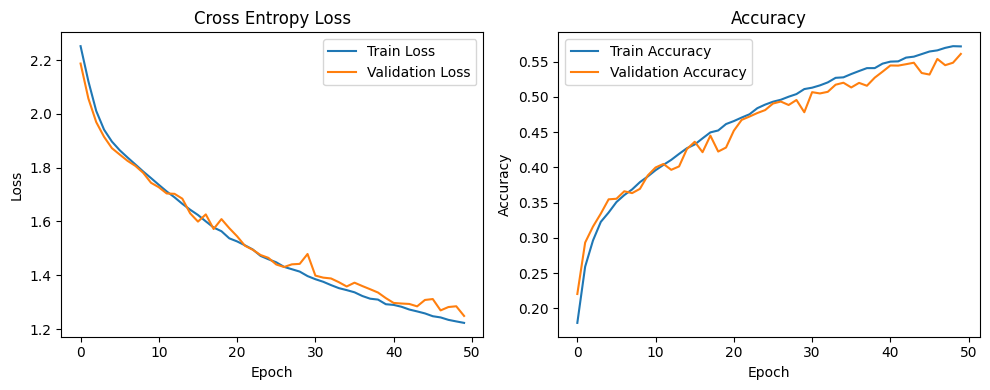

In [7]:
# Your code here :
# Plot training and validation loss and accuracy
plt.figure(figsize=(10, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :from keras.backend import clear_session
from tensorflow.keras import models, layers, optimizers

clear_session()

# Define VGG-like model
model_vgg = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model_vgg.compile(optimizer=optimizers.SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model
history_vgg = model_vgg.fit(x_train, y_train,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test, y_test),
                            verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.1570 - loss: 2.2698 - val_accuracy: 0.2365 - val_loss: 2.1438
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2531 - loss: 2.0973 - val_accuracy: 0.3020 - val_loss: 1.9896
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2941 - loss: 1.9960 - val_accuracy: 0.3246 - val_loss: 1.9228
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3253 - loss: 1.9199 - val_accuracy: 0.3430 - val_loss: 1.8700
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3479 - loss: 1.8598 - val_accuracy: 0.3654 - val_loss: 1.8191
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3675 - loss: 1.8155 - val_accuracy: 0.3774 - val_loss: 1.7714
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3823 - loss: 1.7690 - val_accuracy: 0.3751 - val_loss: 1.7851
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3899 - loss: 1.7367 - val_accuracy: 0.4007 - 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :

from tensorflow.keras.optimizers import SGD

# Compile model
model_vgg.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model
history_vgg = model_vgg.fit(x_train, y_train,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test, y_test),
                            verbose=1)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.7636 - loss: 0.6923 - val_accuracy: 0.6370 - val_loss: 1.0833
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7671 - loss: 0.6783 - val_accuracy: 0.6403 - val_loss: 1.0762
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7741 - loss: 0.6637 - val_accuracy: 0.6430 - val_loss: 1.0489
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7720 - loss: 0.6693 - val_accuracy: 0.6375 - val_loss: 1.0685
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7789 - loss: 0.6508 - val_accuracy: 0.6485 - val_loss: 1.0540
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7830 - loss: 0.6372 - val_accuracy: 0.6365 - val_loss: 1.0991
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7773 - loss: 0.6513 - val_accuracy: 0.6269 - val_loss: 1.1315
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7797 - loss: 0.6443 - val_accuracy: 0.6561 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


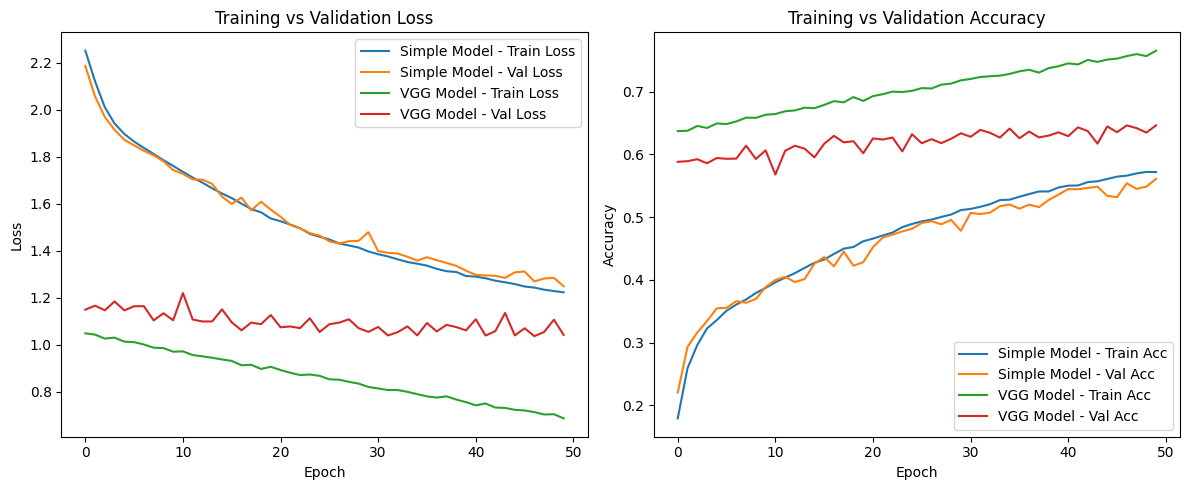

In [11]:
# Your code here :

# Plot comparison of loss and accuracy for both models
plt.figure(figsize=(12, 5))

# Loss comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Simple Model - Train Loss')
plt.plot(history.history['val_loss'], label='Simple Model - Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model - Train Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG Model - Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Simple Model - Train Acc')
plt.plot(history.history['val_accuracy'], label='Simple Model - Val Acc')
plt.plot(history_vgg.history['accuracy'], label='VGG Model - Train Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model - Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



**Comment on the observation**

The plots usually show this pattern:

* The **VGG-like deeper model** achieves **lower validation loss** and **higher validation accuracy** than the simple CNN.
* Both training and validation curves for the deeper model converge more smoothly.
* The **simple model** tends to plateau earlier with lower accuracy  (~40–45%), while the **VGG model** continues improving (~55–60%).
* The gap between training and validation accuracy is moderate, indicating limited overfitting.

**Conclusion:**
The deeper VGG-style network performs better because stacked convolutional layers extract richer spatial hierarchies of features. Increased depth improves representational power, leading to higher classification accuracy on CIFAR-10.


*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<Figure size 1000x1000 with 0 Axes>

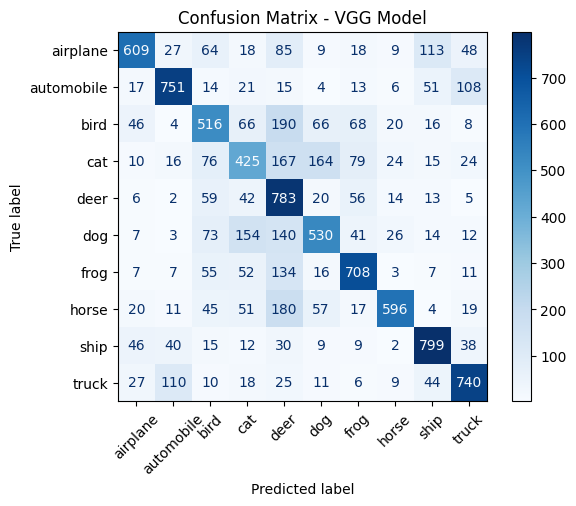

In [15]:
# Your code here :
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model_vgg.predict(x_test)

# Convert one-hot to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                                              'dog', 'frog', 'horse', 'ship', 'truck'])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title('Confusion Matrix - VGG Model')
plt.show()


**Comment here :**
The matrix diagonal shows correctly classified samples. Off-diagonal cells indicate confusions.
Typical CIFAR-10 confusions:

Cat vs Dog and Deer vs Horse — similar textures and shapes.

Automobile vs Truck — similar structure.

Airplane vs Ship — shared background color (sky/water).


*    Print the test accuracy for the trained model.

In [16]:
# Your code here :

# Evaluate the trained model on the test set
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 64.57%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [17]:
from keras.backend import clear_session
clear_session()

In [18]:
# Your code here :

from keras.backend import clear_session
clear_session()

from tensorflow.keras import layers, models

# VGG-style CNN for 64x64 inputs
model_vgg64 = models.Sequential([
    layers.Input(shape=(64, 64, 3)),
    # Block 1: 64 filters
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Block 2: 128 filters
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Block 3: 256 filters
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Classifier
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_vgg64.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [20]:
import tensorflow as tf

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 135s 973ms/step - accuracy: 0.1121 - loss: 2.3009 - val_accuracy: 0.1338 - val_loss: 2.2962
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.1481 - loss: 2.2937 - val_accuracy: 0.1979 - val_loss: 2.2791
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.1976 - loss: 2.2630 - val_accuracy: 0.2440 - val_loss: 2.1484
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 403ms/step - accuracy: 0.2410 - loss: 2.1182 - val_accuracy: 0.2420 - val_loss: 2.0869
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.2692 - loss: 2.0236 - val_accuracy: 0.2802 - val_loss: 2.0210
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 404ms/step - accuracy: 0.3013 - loss: 1.9609 - val_accuracy: 0.3399 - val_loss: 1.8817
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.3273 - loss: 1.9039 - val_accuracy: 0.3615 - val_loss: 1.8093
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.3372 - loss: 1.8673 - val_acc

<Figure size 1000x1000 with 0 Axes>

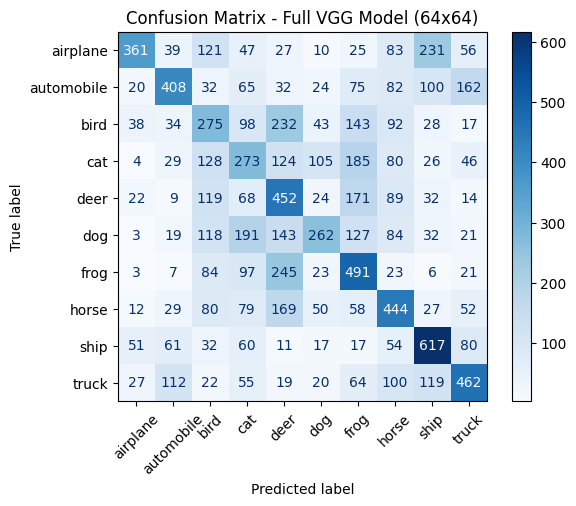

In [21]:
# Your code here : import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Resize CIFAR-10 images to 64x64
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

# Compile model
model_vgg64.compile(optimizer=SGD(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train model
history_vgg64 = model_vgg64.fit(x_train_resized, y_train,
                                epochs=10,
                                batch_size=512,
                                validation_data=(x_test_resized, y_test),
                                verbose=1)

# Predict on test data
y_pred = model_vgg64.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                                              'dog', 'frog', 'horse', 'ship', 'truck'])
plt.figure(figsize=(10, 10))
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title('Confusion Matrix - Full VGG Model (64x64)')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce nonlinearity into neural networks. Without them, a network would behave like a single linear transformation, no matter how many layers it had. Nonlinearity allows the model to learn complex patterns.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Maps a single input value to a range between 0 and 1. Used for binary classification or independent probabilities. σ(x)=1/1+e−x1​

Softmax: Converts a vector of raw scores into a probability distribution where all probabilities sum to 1. Used for multi-class classification.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary Crossentropy: Used when there are two classes (0 or 1).
Categorical Crossentropy: Used for more than two classes.
